In [1]:
# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import dataset

In [49]:
data = pd.read_csv("Position_Salaries.csv")
X = data["Level"].values.reshape(len(X),1)
y = data["Salary"].values.reshape(len(y),1)

In [50]:
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [51]:
# Feature Scaling: We need to scale the dependent value and feature as well want to bring it between -1 and 1

In [52]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [53]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [54]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [56]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [57]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [58]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [59]:
# Training
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR()

In [60]:
# Predicting new result

In [61]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

In [62]:
# Visualizing 

In [66]:
sc_X.inverse_transform(X)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

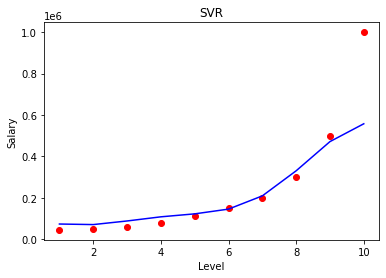

In [68]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title("SVR")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()